In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
cd /content/drive/'My Drive'/sir_nasir_assignment/

/content/drive/My Drive/sir_nasir_assignment


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import warnings

In [9]:
xls_file = pd.ExcelFile('Assignment2.xls')
xls_file

In [10]:
# View the excel file's sheet names
xls_file.sheet_names

['edited data', 'edited data ', 'satisfaction ']

In [11]:
# Load the xls file's Sheet1 as a dataframe
df2 = xls_file.parse('edited data ')
df2

,AGE,pre oxford score,post oxford score,score change,pre-op EQ5D,post-op EQ5D,EQ5D change,GENDER,post op satisfaction
0,63,19,41,22,0.088,0.725,0.637,1,2
1,63,7,46,39,0.159,1.000,0.841,1,2
2,70,21,32,11,0.691,0.796,0.105,2,3
3,76,36,35,-1,0.691,0.691,0.000,1,3
4,72,31,19,-12,0.516,0.516,0.000,1,3
...,...,...,...,...,...,...,...,...,...
1669,68,10,22,12,0.620,0.760,0.140,2,3
1670,76,27,21,-6,0.516,0.516,0.000,1,4
1671,66,4,33,29,0.620,0.691,0.071,1,3
1672,73,18,42,24,0.587,0.620,0.033,2,4


In [0]:
data1= df2[['AGE', 'score change ']]

In [13]:
data1

,AGE,score change
0,63,22
1,63,39
2,70,11
3,76,-1
4,72,-12
...,...,...
1669,68,12
1670,76,-6
1671,66,29
1672,73,24


In [0]:
x = data1['AGE']
y = data1['score change ']

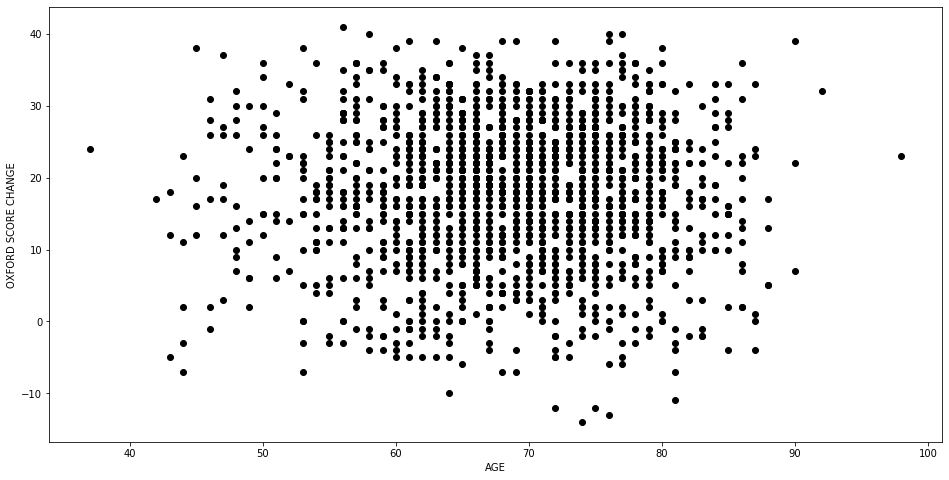

In [15]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data1['AGE'],
    data1['score change '],
    c='black'
)
plt.xlabel("AGE")
plt.ylabel("OXFORD SCORE CHANGE")
plt.show()

In [16]:
X = data1['AGE'].values.reshape(-1,1)
y = data1['score change '].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 17.411 + 0.0079524X


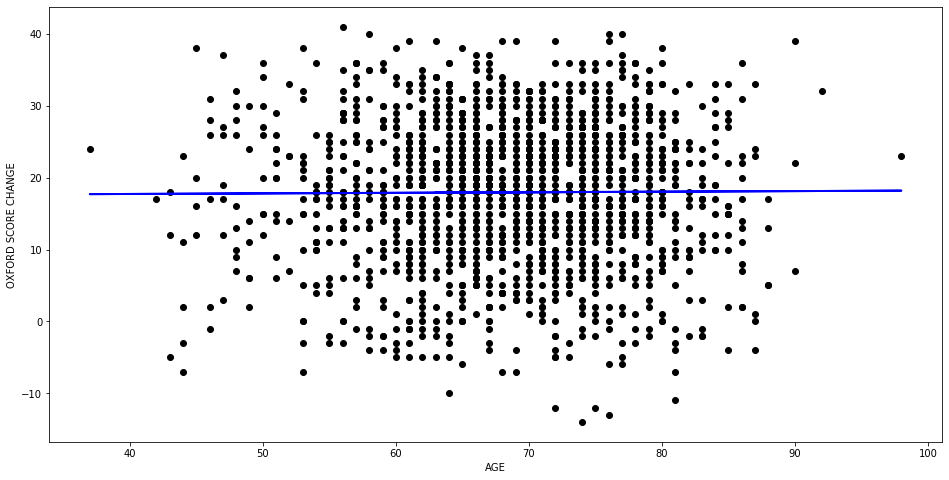

In [17]:
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    data1['AGE'],
    data1['score change '],
    c='black'
)
plt.plot(
    data1['AGE'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("AGE")
plt.ylabel("OXFORD SCORE CHANGE")
plt.show()

In [18]:
warnings.simplefilter(action='ignore', category=FutureWarning)
X = data1['AGE']
y = data1['score change ']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          score change    R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.08348
Date:                Sat, 25 Jan 2020   Prob (F-statistic):              0.773
Time:                        00:34:44   Log-Likelihood:                -6210.4
No. Observations:                1674   AIC:                         1.242e+04
Df Residuals:                    1672   BIC:                         1.244e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.4111      1.905      9.140      0.0